Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [501]:
NAME = "Anjana Tissera"
ID = "123459"

---

# Machine Learning Lab 04: Multinomial Logistic Regression


## Generalized Linear Models

From lecture, we know that members of the exponential family distributions can be written in the form
$$p(y;\eta) = b(y)e^{(\eta^\top T(y)-a(\eta))},$$
where
- $\eta$ is the natural parameter or canonical paramter of the distribution,
- $T(y)$ is the sufficient statistic (we normally use $T(y) = y$),
- $b(y)$ is an arbitrary scalar function of y, and
- $a(\eta)$ is the log partition function. We use $e^{a(\eta)}$ just to normalize the distribution to have a sum or integral of 1.

Each choice of $T$, $a$, and $b$ defines a family (set) of distributions parameterized by $\eta$.

If we can write $p(y \mid \mathbf{x} ; \theta)$ as a member of the exponential family of distributions with parameters $\mathbf{\eta}$ with
$\eta_i = \theta^\top_i \mathbf{x}$, we obtain a *generalized linear model* that can be optimized using the maximum likelihood principle.

The GLM for the Gaussian distribution with natural parameter $\eta$ being the mean of the Gaussian gives us ordinary linear regression.

The Bernoulli distribution with parameter $\phi$ can be written as an exponential distribution
with natural parmeter $\eta = \log \frac{\phi}{1-\phi}$. The GLM for this distribution is logistic regression.

When we write the multinomial distribution with paremeters $\phi_i > 0$ for classes $i \in 1..K$ with the constraint that
$$\sum_{i=1}^{K} \phi_i = 1$$ as a member of the exponential family,
the resulting GLM is called *multinomial logistic regression*. The parameters $\phi_1, \ldots, \phi_K$ are written
in terms of $\theta$ as
$$\phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

## Optimizing a Multinomial Regression Model

In multinomial regression, we have

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

We need a cost function and a way to minimize that cost function. As usual, we try to find the parameters maximizing the likelihood or log likelihood function, or equivalently, minimizing the negative log likelihood function:

$$\theta^* = \text{argmax}_\theta {\cal L}(\theta) =
             \text{argmax}_\theta \ell(\theta) =
             \text{argmin}_\theta J(\theta),$$
where
$$\begin{eqnarray}
   J(\theta) & = & - \ell(\theta) \\
   & = & - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)} ; \theta).
   \end{eqnarray}$$

Now that we know what is $J(\theta)$, let's try to find its minimimum by taking the derivatives with respect to an arbitrary parameter $\theta_{kl}$, the $l$-th element of the parameter vector $\theta_k$ for class $k$. Before we start, let's define a variable $a_k$ as the linear activation for class $k$ in the softmax function:
$$ a_k = \theta_k^\top \mathbf{x}^{(i)}, $$
and rewrite the softmax more conveniently as
$$ \phi_k = \frac{e^{a_k}}{\sum_{j=1}^K e^{a_j}}. $$
That makes it a little easier to compute the gradient:
$$\begin{eqnarray}
   \frac{\partial J}{\partial \theta_{kl}} & = & - \sum_{i=1}^m \frac{1}{\phi_{y^{(i)}}} \frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}}. \\
   \end{eqnarray}$$
Using the chain rule, we have
$$\frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}} = \sum_{j=1}^K \frac{\partial \phi_{y^{(i)}}}{\partial a_j} \frac{\partial a_j}{\partial \theta_{kl}}$$
The second factor is easy:
$$ \frac{\partial a_j}{\partial \theta_{kl}} = \delta(k=j)x^{(i)}_l. $$
For the first factor, we have
$$\begin{eqnarray}
\frac{\partial \phi_{y^{(i)}}}{\partial a_j}
& = & \frac{ \left[ \delta(y^{(i)}=j)e^{a_j} \sum_{c=1}^K e^{a_c} \right] - e^{a_j} e^{a_j} }{\left[ \sum_{c=1}^K e^{a_c} \right]^2} \\
& = & \delta(y^{(i)}=j) \phi_j - \phi_j^2
\end{eqnarray}$$

Substituting what we've derived into the definition above, we obtain
$$ \frac{\partial J}{\theta_{kl}} = - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}}. $$

There are two ways to do the calculation.
In deep neural networks with multinomial outputs, we want to first calculate the $\frac{\partial J}{\partial a_j}$ terms then use them to calculate $\frac{\partial J}{\partial \theta_{kl}}$.

However, if we only have the "single layer" model described up till now, we note
that
$$\frac{\partial a_j}{\partial \theta_{kl}} = \delta(j=k) x^{(i)}_l,$$
so we can simplify as follows:
$$\begin{eqnarray}
  \frac{\partial J}{\theta_{kl}} & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}} \\
  & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \delta(j=k) x^{(i)}_l \\
  & = & - \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l \\
  \end{eqnarray}$$

## Put It Together

OK! Now we have all 4 criteria for our multinomial regression model:

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$
    
3. The cost function is
   $$J(\theta) = - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)})$$
   
4. The optimization algorithm is gradient descent on $J(\theta)$ with the update rule
   $$\theta_{kl}^{(n+1)} \leftarrow \theta_{kl}^{(n)} - \alpha \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l.$$


## Multinomial Regression Example

The following example of multinomial logistic regression is from [Kaggle](https://www.kaggle.com/saksham219/softmax-regression-for-iris-classification).

The data set is the famous [Iris dataset from the UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/iris).

The data contain 50 samples from each of three classes. Each class refers to a particular species of the iris plant. 
The data include four independent variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

The target takes on one of three classes:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica
   
To predict the target value, we use multinomial logistic regression for $k=3$ classes i.e. $y \in \{ 1, 2, 3 \}$. 

Given $\mathbf{x}$, we would like to predict a probability distribution over the
three outcomes for $y$, i.e., $\phi_1 = p(y=1 \mid \mathbf{x})$, $\phi_2 = p(y=2 \mid \mathbf{x})$, and $\phi_3 = p(y=3 \mid \mathbf{x})$.


In [502]:
# importing libraries
import numpy as np
import pandas as pd 
import random
import math

The `phi` function returns $\phi_i$ for input patterns $\mathtt{X}$ and parameters $\theta$.

In [503]:
def phi(i, theta, X, num_class):
    """
    Here is how to make documentation for your function show up in intellisense.
    Explanation you put here will be shown when you use it.
    
    To get intellisense in your Jupyter notebook:
        - Press 'TAB' after typing a dot (.) to see methods and attributes
        - Press 'Shift+TAB' after typing a function name to see its documentation

    The `phi` function returns phi_i = h_theta(x) for input patterns X and parameters theta.
    
    Inputs:
        i=index of phi
        
        X=input dataset
        
        theta=parameters

    Returns:
        phi_i
    """
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta, mat_x.T))
    den = 0
    for j in range(0,num_class):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j, mat_x.T))
    phi_i = num / den
    return phi_i

**Tips for using intellisense: Shift+TAB**

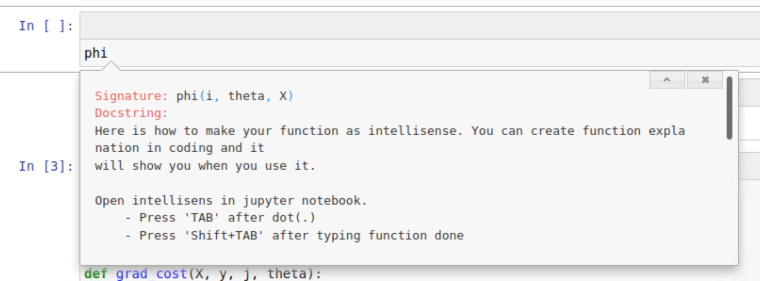

The `grad_cost` function gives the gradient of the cost for data $\mathtt{X}, \mathbf{y}$ for class $j\in 1..k$.

In [504]:
def indicator(i, j):
    '''
    Check whether i is equal to j
    
    Return:
        1 when i=j, otherwise 0
    '''
    if i == j: return 1
    else: return 0


def grad_cost(X, y, j, theta, num_class):
    '''
    Compute the gradient of the cost function for data X, y for parameters of
    output for class j in 1..k
    '''
    m, n = X.shape
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        sum = sum + (X.loc[i] * p)
    grad = -sum / m
    return grad

def gradient_descent(X, y, theta, alpha, iters, num_class):
    '''
    Perform iters iterations of gradient descent: theta_new = theta_old - alpha * cost
    '''
    n = X.shape[1]
    for iter in range(iters):
        dtheta = np.zeros((num_class, n)) #(k x n)
        for j in range(0, num_class):
            dtheta[j,:] = grad_cost(X, y, j, theta, num_class)
        theta = theta - alpha * dtheta
    return theta

def h(X, theta, num_class):
    '''
    Hypothesis function: h_theta(X) = theta * X, Softmax function
    '''
    X = np.matrix(X)
    h_matrix = np.empty((num_class,1))
    den = 0
    for j in range(0, num_class):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,num_class):
        h_matrix[i] = math.exp(np.dot(theta[i], X.T))
    h_matrix = h_matrix / den
    return h_matrix

## Exercise 1.1 (5 points)

Create a function to load **data** from **Iris.csv** using the Pandas library and extract y from the data.

You can use [the Pandas 10 minute guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to learn how to use pandas.

In [505]:
def load_data(file_name, drop_label, y_label, is_print=False):
    # 1. Load csv file
    data = pd.read_csv(file_name)
    if is_print:
        print(data.head())
    # 2. remove 'Id' column from data
    if drop_label is not None:
        data = data.drop([drop_label],axis=1)
        if is_print:
            print(data.head())
    # 3. Extract y_label column as y from data
    y = None
    # 4. get index of y-column
    y_index = data.columns.get_loc(y_label)
    # 5. Extrack X features from data
    X = None
    # YOUR CODE HERE
    y = data.iloc[:,y_index]
    X = data.iloc[:,0:y_index]
    return X, y

In [506]:
X, y = load_data('Iris.csv', 'Id', 'Species', True)
print(X.head())
print(y[:5])

# Test function: Do not remove
# tips: this is how to create dataset using pandas
d_ex = {'ID':     [  1,   2,   3,    4,    5,    6,    7],
        'Grade':  [3.5, 2.5, 3.0, 3.75, 2.83, 3.95, 2.68],
        'Type':   ['A', 'B', 'C',  'A',  'C',  'A',  'B']
        }
df = pd.DataFrame (d_ex, columns = ['ID','Grade', 'Type'])
df.to_csv('out.csv', index=False)

Xtest, ytest = load_data('out.csv', 'ID', 'Type')
assert len(Xtest.columns) == 1, 'number of X_columns incorrect (1)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (1)'
assert ytest.shape == (7,), 'number of y is incorrect (1)'
assert 'Grade' in Xtest.columns, 'Incorrect columns in X (1)'
Xtest, ytest = load_data('out.csv', None, 'Type')
assert len(Xtest.columns) == 2, 'number of X_columns incorrect (2)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (2)'
assert ytest.shape == (7,), 'number of y is incorrect (2)'
assert 'Grade' in Xtest.columns and 'ID' in Xtest.columns, 'Incorrect columns in X (2)'
import os
os.remove('out.csv')

assert len(X.columns) == 4, 'number of X_columns incorrect (3)'
assert 'SepalWidthCm' in X.columns and 'Id' not in X.columns and 'Species' not in X.columns, 'Incorrect columns in X (3)'
assert y.name == 'Species', 'Extract y_column is incorrect (3)'
assert y.shape == (150,), 'number of y is incorrect (3)'

print("success!")
# End Test function

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5          

**Expected result**: \
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm \
0            5.1           3.5            1.4           0.2\
1            4.9           3.0            1.4           0.2\
2            4.7           3.2            1.3           0.2\
3            4.6           3.1            1.5           0.2\
4            5.0           3.6            1.4           0.2\
0    Iris-setosa\
1    Iris-setosa\
2    Iris-setosa\
3    Iris-setosa\
4    Iris-setosa\
Name: Species, dtype: object

In [507]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Exercise 1.2 (10 points)

Partition data into training and test sets
- No need to use random.seed function!
- Ensure that the train set is 70% and the test set is 30% of the data.
- Encode the labels in the y attribute to be integers in the range 0..k-1.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use the <tt>partition</tt> function from lab02 if you like
    <p></p>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html">panda.iloc</a> must be used to extract data from an index list
    <p></p>
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.unique.html">panda.unique</a> will give you the set of unique labels
</details>

In [508]:
def partition(X, y, percent_train):
    # 1. create index list
    # 2. shuffle index
    # 3. Create train/test index
    # 4. Separate X_Train, y_train, X_test, y_test
    # 5. Get y_labels_name from y using pandas.unique function
    # 6. Change y_labels_name into string number and put into y_labels_new
    # 7. Drop shuffle index columns
    #     - pandas.reset_index() and pandas.drop(...) might be help
    
    y_labels_name = None
    y_labels_new = None
    
    # YOUR CODE HERE
    # 1. create index list
    m,n  = X.shape
    idx = np.arange(0,m)
    
    # 2. shuffle index
    random.shuffle(idx)
    
    # 3. Create train/test index
    m_train = int(m * percent_train)
    train_idx = idx[0:m_train]
    test_idx = idx[m_train:]
    
    # 4. Separate X_Train, y_train, X_test, y_test
    X_train = X.iloc[train_idx,:]
    X_test = X.iloc[test_idx,:]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    # 5. Get y_labels_name from y using pandas.unique function
    y_labels_name = pd.unique(y)
    
    # 6. Change y_labels_name into string number and put into y_labels_new
    i = 0
    for label in y_labels_name:
        y_train[y_train.str.match(label)] = str(i)
        y_test[y_test.str.match(label)] = str(i)
        i = i + 1  
        
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    y_labels_new = pd.unique(y_train)
    
    # 7. Drop shuffle index columns
    #     - pandas.reset_index() and pandas.drop(...) might be help
    X_train = X_train.reset_index()
    X_train = X_train.drop(['index'],axis=1)
    X_test = X_test.reset_index()
    X_test = X_test.drop(['index'],axis=1)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    return idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new

In [525]:
percent_train = 0.7
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X, y, percent_train)
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)
print('y_labels_name: ', y_labels_name)
print('y_labels_new: ', y_labels_new)
print(X_train.head())
print(y_train.head())

# Test function: Do not remove
assert len(y_labels_name) == 3 and len(y_labels_new) == 3, 'number of y uniques are incorrect'
assert X_train.shape == (105, 4), 'Size of X_train is incorrect'
assert X_test.shape == (45, 4), 'Size of x_test is incorrect'
assert y_train.shape == (105, ), 'Size of y_train is incorrect'
assert y_test.shape == (45, ), 'Size of y_test is incorrect'
assert 'Iris-setosa' in y_labels_name and 'Iris-virginica' in y_labels_name and \
        'Iris-versicolor' in y_labels_name, 'y unique data incorrect'
assert min(y_labels_new) == 0 and max(y_labels_new) < 3, 'label indices are incorrect'

print("success!")
# End Test function

X_train.shape (105, 4)
X_test.shape (45, 4)
y_train.shape (105,)
y_test.shape (45,)
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
y_labels_new:  [0 2 1]
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            4.6           3.1            1.5           0.2
1            6.0           2.2            5.0           1.5
2            5.7           3.0            4.2           1.2
3            6.3           3.3            6.0           2.5
4            6.3           2.7            4.9           1.8
0    0
1    2
2    1
3    2
4    2
Name: Species, dtype: int64
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
X_train.shape (105, 4)\
X_test.shape (45, 4)\
y_train.shape (105,)\
y_test.shape (45,)\
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] \
y_labels_new:  [0, 1, 2]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm\
0            6.4           2.8            5.6           2.2\
1            6.7           3.3            5.7           2.1\
2            4.6           3.4            1.4           0.3\
3            5.1           3.8            1.5           0.3\
4            5.0           2.3            3.3           1.0\
   Species\
0        2\
1        2\
2        0\
3        0\
4        1

## Exercise 1.3 (5 points)

Train your classification model using the `gradient_descent` function already provided.
You might also play around with the gradient descent function to see if you can speed it up!

In [526]:
# num_class is the number of unique labels
num_class = len(y_labels_name)

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data
r, c = X_train.shape

# Initialize theta for each class
theta_initial = np.ones((num_class, c))

alpha = .05
iterations = 200

theta = None
# Logistic regression
# YOUR CODE HERE
theta = gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)

In [527]:
print(theta)
print(theta.shape)

# Test function: Do not remove
assert theta.shape == (3, 5), 'Size of theta is incorrect'

print("success!")
# End Test function

[[ 1.1646571   1.32209189  1.83105121 -0.20755     0.44672245]
 [ 1.08763488  1.15453124  0.73150682  1.23310738  0.79487519]
 [ 0.74770802  0.52337687  0.43744197  1.97444261  1.75840236]]
(3, 5)
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[ 1.17632192  1.32360047  1.83204165 -0.20224445  0.44039155]\
 [ 1.10140069  1.13537321  0.74833178  1.21907866  0.82567377]\
 [ 0.72227738  0.54102632  0.41962657  1.98316579  1.73393467]]\
\
(3, 5)

## Exercise 1.4 (5 points)

Let's get your model to make predictions on the test data.

In [528]:
# Prediction on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data
r,c = X_test.shape

y_pred = []
for index,row in X_test.iterrows(): # get a row of X_test data
    # calculate y_hat using hypothesis function
    y_hat = None
    # find the index (integer value) of maximum value in y_hat and input back to prediction
    prediction = None
    
    # YOUR CODE HERE
    y_hat = h(row, theta, num_class)
    prediction = int(np.where(y_hat == y_hat.max())[0])
    
    # collect the result
    y_pred.append(prediction)

In [529]:
print(len(y_pred))
print(y_pred[:7])
print(type(y_pred[0]))

# Test function: Do not remove
assert len(y_pred) == 45, 'Size of y_pred is incorrect'
assert isinstance(y_pred[0], int) and isinstance(y_pred[15], int) and isinstance(y_pred[17], int), 'prediction type is incorrect'
assert max(y_pred) < 3 and min(y_pred) >= 0, 'wrong index of y_pred'

print("success!")
# End Test function

45
[0, 0, 1, 1, 1, 1, 2]
<class 'int'>
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
45 \
[2, 0, 2, 0, 0, 0, 2] \
<class 'int'>

## Exercise 1.5 (5 points)

Estimate accuracy of model on test data

$$\text{accuracy} = \frac{\text{number of correct test predictions}}{m_{\text{test}}}$$

In [530]:
(y_pred == y_test).value_counts()

True     43
False     2
Name: Species, dtype: int64

In [531]:
def calc_accuracy(y_test, y_pred):
    accuracy = None
    
    # YOUR CODE HERE
    m = y_test.shape[0]
    correct_pred = (y_pred == y_test).value_counts()[True]
    accuracy = correct_pred/m
    return accuracy

In [532]:
accuracy = calc_accuracy(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

# Test function: Do not remove
assert isinstance(accuracy, float), 'accuracy should be floating point'
assert accuracy >= 0.8, 'Did you train the data?'

print("success!")
# End Test function

Accuracy: 0.9556
success!


**Expected result**: should be at least 0.8!

## On your own in lab

We will do the following in lab:
1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
2. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
3. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.


## Exercise 2.1 (15 points)

1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
   Name your function `my_J()` and implement

$$ J_j = -\delta(y, j)\log{\phi_j} $$


In [533]:
def my_J(theta, X, y, j, num_class):
    cost = None
    # YOUR CODE HERE
    cost = (indicator(y,j)*np.log(phi(j, theta, X, num_class)))*-1
    return cost

In [534]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
cost = my_J(test_theta, X_train.loc[10], y_train[10], 0, 3)
assert isinstance(cost, float), 'cost should be floating point'

print("success!")
# End Test function

success!


2. Implement <code>my_grad_cost</code> using your <code>my_J</code> function

In [535]:
def my_grad_cost(X, y, j, theta, num_class):
    grad = None
    cost = None
    # YOUR CODE HERE
    m, n = X.shape
    cost = 0
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta,X.loc[i], num_class)
        cost = cost + my_J(theta, X.loc[i], y[i], j, num_class)
        sum = sum + (X.loc[i] * p)    
    grad = -sum/m
    return grad, cost

In [536]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
grad, cost = my_grad_cost(X_train, y_train, 0, test_theta, num_class)
print(grad)
print(cost)
assert isinstance(cost, float), 'cost should be floating point'
assert isinstance(grad['intercept'], float) and \
        isinstance(grad['SepalLengthCm'], float) and \
        isinstance(grad['SepalWidthCm'], float) and \
        isinstance(grad['PetalLengthCm'], float) and \
        isinstance(grad['PetalWidthCm'], float) , 'grad should be floating point'
print("success!")
# End Test function

intercept       -0.009524
SepalLengthCm    0.217778
SepalWidthCm    -0.158730
PetalLengthCm    0.729524
PetalWidthCm     0.307937
dtype: float64
39.55004239205195
success!


**Expect result**: <span style="color:blue">(*or similar*)</span>\
intercept        0.009524\
SepalLengthCm    0.316825\
SepalWidthCm    -0.091429\
PetalLengthCm    0.780000\
PetalWidthCm     0.329524\
dtype: float64\
37.352817814715735

3. Implement <code>my_gradient_descent</code> using your <code>my_grad_cost</code> function

In [537]:
def my_gradient_descent(X, y, theta, alpha, iters, num_class):        
    cost_arr = []
    # YOUR CODE HERE
    for iter in range(iters):        
        cost = 0
        for j in range(0, num_class):
            grad_j, cost_j = my_grad_cost(X, y, j, theta, num_class)
            theta[j] = theta[j] - alpha * grad_j
            cost = cost + cost_j
        cost_arr.append(cost)
    return theta, cost_arr

In [538]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
theta, cost = my_gradient_descent(X_train, y_train, theta_initial, 0.001, 5, 3)
print(theta)
print(cost)
print("success!")
# End Test function

[[1.00006001 0.99898723 1.00083056 0.99640776 0.99847891]
 [1.00004167 1.00041273 0.99962832 1.00111164 1.00028479]
 [0.99989491 1.00057911 0.99953098 1.00246535 1.00123118]]
[115.2598222726357, 115.14661205175213, 115.0351928062392, 114.92549225039613, 114.81744129238456]
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[1.00001186 0.99618853 1.00183642 0.9889817  0.99528923]\
 [1.00009697 1.0011823  0.99883395 1.00316763 1.00083055]\
 [0.99987915 1.00255606 0.99929351 1.00779768 1.00386218]]\
[114.00099216453735, 113.89036233839263, 113.78163144339288, 113.67472269747496, 113.56956268162737]\
37.352817814715735

## Exercise 2.2 (20 points)

4. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
5. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.

In [539]:
import matplotlib.pyplot as plt

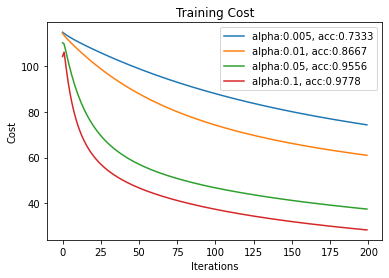

In [540]:
theta_arr = []
cost_arr = []
accuracy_arr = []

# design your own learning rate and num iterations
alpha_arr = np.array([None, None, None, None])
iterations_arr = np.array([None, None, None, None])

# YOUR CODE HERE
alpha_arr = np.array([.005, .01, .05, .1])
iterations_arr = np.array([200, 200, 200, 200])

m, n = X_train.shape

for i in range(0, len(alpha_arr)):    
    theta_initial_i = np.ones((num_class, n))  
    theta_i, cost_i = my_gradient_descent(X_train, y_train, theta_initial_i, alpha_arr[i], iterations_arr[i], num_class)
    
    y_pred = []
    for index,row in X_test.iterrows(): 
        y_hat = h(row, theta_i, num_class)
        prediction = int(np.where(y_hat == y_hat.max())[0])
        y_pred.append(prediction)
        
    accuracy_i = calc_accuracy(y_test, y_pred)
    
    theta_arr.append(theta_i)
    cost_arr.append(cost_i)    
    accuracy_arr.append(accuracy_i)
    
    plt.plot(cost_i, label='alpha:'+str(alpha_arr[i]) +', acc:' + str(np.round(accuracy_arr[i],4)))
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Cost')
plt.legend()
plt.show()




**Expected result**: <span style="color:blue">(*Yours doesn't have to be the same!*)</span>

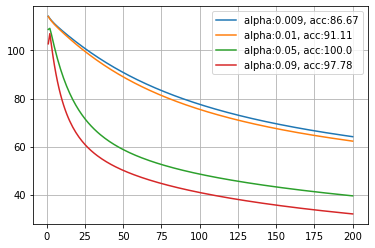

In [541]:
theta_arr[3]

array([[ 1.23248294,  1.51023894,  2.14630841, -0.55212162,  0.28281787],
       [ 1.19930866,  1.35403046,  0.74954291,  1.22008571,  0.56335557],
       [ 0.60256047,  0.32813311,  0.21371945,  2.43412365,  2.18315147]])

In [542]:
# Get predictions for training set
theta = theta_arr[3]
y_pred_train = []
for index,row in X_train.iterrows():
    y_hat = h(row, theta, num_class)
    prediction = int(np.where(y_hat == y_hat.max())[0])    
    # collect the result
    y_pred_train.append(prediction)

In [547]:
type(y_train)

pandas.core.series.Series

In [548]:
df_plot = X_train.copy()

df_plot.insert(0, "Species_Actual", y_train)

df_plot.head()

,Species_Actual,intercept,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,1,4.6,3.1,1.5,0.2
1,2,1,6.0,2.2,5.0,1.5
2,1,1,5.7,3.0,4.2,1.2
3,2,1,6.3,3.3,6.0,2.5
4,2,1,6.3,2.7,4.9,1.8


In [549]:
df_plot.insert(1, "Species_Pred", y_pred_train)

df_plot.head()

,Species_Actual,Species_Pred,intercept,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,0,1,4.6,3.1,1.5,0.2
1,2,2,1,6.0,2.2,5.0,1.5
2,1,1,1,5.7,3.0,4.2,1.2
3,2,2,1,6.3,3.3,6.0,2.5
4,2,2,1,6.3,2.7,4.9,1.8


<AxesSubplot:title={'center':'Predicted'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

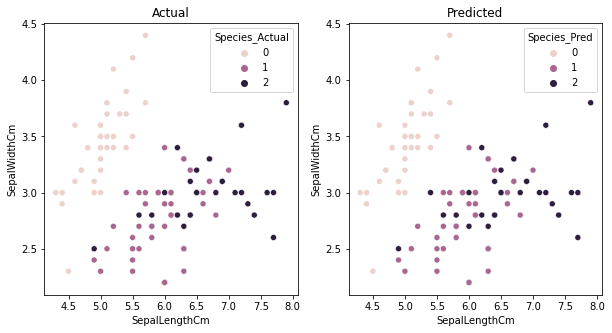

In [552]:
import seaborn as sns

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('Actual')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df_plot, hue="Species_Actual", ax=ax1)

ax2.set_title('Predicted')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df_plot, hue="Species_Pred", ax=ax2)

<AxesSubplot:title={'center':'Predicted'}, xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

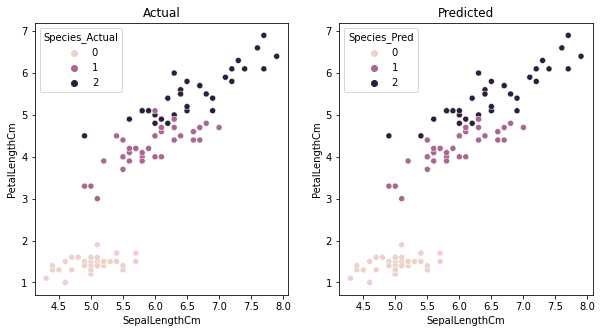

In [553]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('Actual')
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=df_plot, hue="Species_Actual", ax=ax1)

ax2.set_title('Predicted')
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=df_plot, hue="Species_Pred", ax=ax2)

<AxesSubplot:title={'center':'Predicted'}, xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

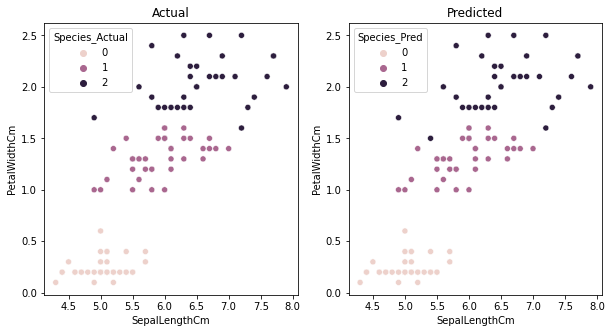

In [554]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('Actual')
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', data=df_plot, hue="Species_Actual", ax=ax1)

ax2.set_title('Predicted')
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', data=df_plot, hue="Species_Pred", ax=ax2)

<AxesSubplot:title={'center':'Predicted'}, xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

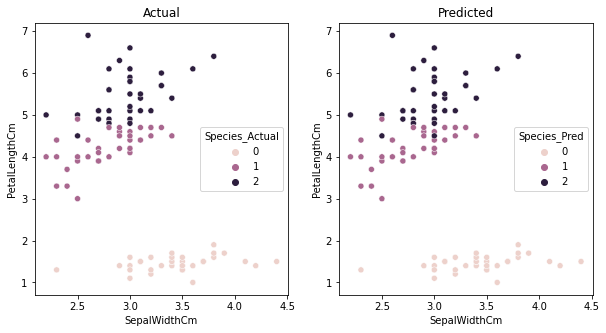

In [555]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('Actual')
sns.scatterplot(x='SepalWidthCm', y='PetalLengthCm', data=df_plot, hue="Species_Actual", ax=ax1)

ax2.set_title('Predicted')
sns.scatterplot(x='SepalWidthCm', y='PetalLengthCm', data=df_plot, hue="Species_Pred", ax=ax2)

<AxesSubplot:title={'center':'Predicted'}, xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

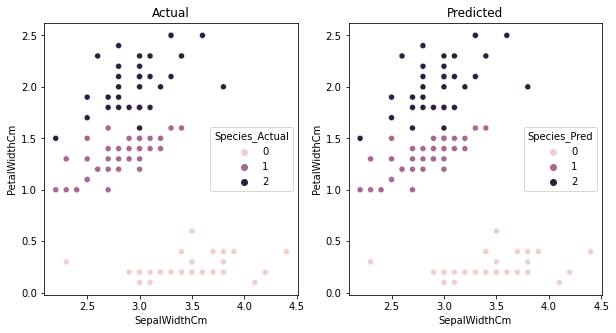

In [556]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('Actual')
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', data=df_plot, hue="Species_Actual", ax=ax1)

ax2.set_title('Predicted')
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', data=df_plot, hue="Species_Pred", ax=ax2)

<AxesSubplot:title={'center':'Predicted'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

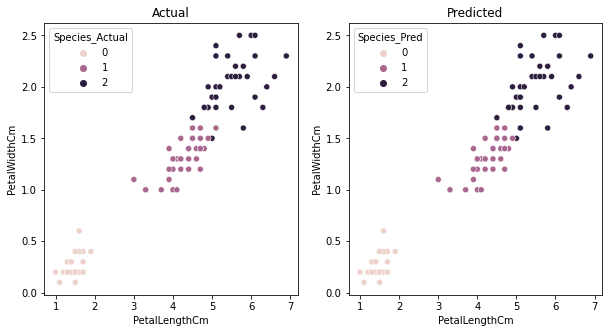

In [557]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('Actual')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df_plot, hue="Species_Actual", ax=ax1)

ax2.set_title('Predicted')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df_plot, hue="Species_Pred", ax=ax2)

**Discussion** - In the trainig dataset sometimes we see erros in predicted and actual class, this is because some of the fetures are poorly corelated. For example for features SepalLengthCm and SepalWidthCm we see a good correlation only ofr the species endoced as '0' but not for the other two species types.

## On your own to take home

We see that the Iris dataset is pretty easy. Depending on the train/test split, we get 95-100% accuracy.

Find a more interesting multi-class classification problem on Kaggle (Tell the reference), clean the dataset to obtain numerical input features without missing values,
split the data into test and train, and experiment with multinomial logistic regression.

Write a brief report on your experiments and results. As always, turn in a Jupyter notebook by email
to the instructor and TA.


### Answer:

In this exercise I will be using the Palmer Archipelago (Antarctica) penguin dataset which is used for classification of Penguins species.

**Problem statement** - Classify penguins in Palmer Archipelago using features island ,culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g and sex into three species types 'Adelie', 'Gentoo' and 'Chinstrap'.

**Reference:** https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/data?select=penguins_size.csv



#### Load data

In [458]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [459]:
# Import the data

df = pd.read_csv('penguins_size.csv')

#### Explore data

In [460]:
print('Data shape', df.shape)

Data shape (344, 7)


In [461]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [463]:
# Expplore island

df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [464]:
# Expplore sex

df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

#### Filling missing values

In [465]:
# Check for missing values in the dataset

print('Missing values:\n------------------------\n', df.isnull().sum())

Missing values:
------------------------
 species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [466]:
# Dropping rows where many of the columns have NaN

c1 = df['culmen_length_mm'].isnull()
c2 = df['culmen_depth_mm'].isnull()
c3 = df['culmen_depth_mm'].isnull()
c4 = df['body_mass_g'].isnull()
c5 = df['sex'].isnull()

many_null = np.where(c1 & c2 & c3 & c4 & c5)

print (many_null)
df.iloc[many_null[0], :]

(array([  3, 339]),)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [467]:
# Rows 3 and 339 will be dropped due to many NaN
df.drop(many_null[0], axis = 0, inplace=True)
print('Data shape', df.shape)
print('Missing values:\n------------------------\n', df.isnull().sum())

Data shape (342, 7)
Missing values:
------------------------
 species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64


In [468]:
# Fill missing values - sex
print(df['sex'].value_counts())
sex_val_count = df['sex'].value_counts()
print('Sex ratio ', sex_val_count[0]/sum(sex_val_count.values))

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64
Sex ratio  0.5029940119760479


In [469]:
male_num = 4
female_num = 4

df['sex'].fillna('MALE',inplace=True, limit = male_num )
df['sex'].fillna('FEMALE',inplace=True, limit = female_num)    
    

In [470]:
print(df['sex'].value_counts()) 
print('Missing values:\n------------------------\n', df.isnull().sum())

MALE      172
FEMALE    169
.           1
Name: sex, dtype: int64
Missing values:
------------------------
 species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


#### Examine the distribution of the target column 'species'

In [471]:
df['species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

**Discussion**
- From the species type 'Chinstrap' we have only 68 samples. 
- Therefore in the above information we can see that there is a imbalanced class problem
- To solve this I used 'Undersampling' approach. From 'Adelie' and 'Gentoo' species types, I selected 68 samples at random.


In [472]:
#1. Class Chinstrap
species_chinstrap = df.loc[df['species'] == 'Chinstrap']
print(species_chinstrap.shape)
species_chinstrap.head()

(68, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,FEMALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE


In [473]:
#2. Class Adelie
species_adelie = df.loc[df['species'] == 'Adelie'].sample(n=68, random_state=999)
print(species_adelie.shape)
species_adelie.head()

(68, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
62,Adelie,Biscoe,37.6,17.0,185.0,3600.0,FEMALE
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE
80,Adelie,Torgersen,34.6,17.2,189.0,3200.0,FEMALE
41,Adelie,Dream,40.8,18.4,195.0,3900.0,MALE
37,Adelie,Dream,42.2,18.5,180.0,3550.0,FEMALE


In [474]:
#3. Class Gentoo
species_gentoo = df.loc[df['species'] == 'Gentoo'].sample(n=68, random_state=999)
print(species_gentoo.shape)
species_gentoo.head()

(68, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,MALE
294,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,FEMALE
257,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,MALE
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [475]:
new_df = pd.concat([species_chinstrap, species_adelie, species_gentoo])
new_df['species'].value_counts()

Chinstrap    68
Adelie       68
Gentoo       68
Name: species, dtype: int64

#### Converting categorical data to numerical

In [476]:
print(new_df.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 152 to 278
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            204 non-null    object 
 1   island             204 non-null    object 
 2   culmen_length_mm   204 non-null    float64
 3   culmen_depth_mm    204 non-null    float64
 4   flipper_length_mm  204 non-null    float64
 5   body_mass_g        204 non-null    float64
 6   sex                204 non-null    object 
dtypes: float64(4), object(3)
memory usage: 12.8+ KB
None 



In [477]:
# Converting type - species
new_df['species'].replace('Chinstrap', 0, inplace = True)
new_df['species'].replace('Adelie', 1, inplace = True)
new_df['species'].replace('Gentoo', 2, inplace = True)

new_df['species'].value_counts()

0    68
1    68
2    68
Name: species, dtype: int64

In [478]:
# Converting type - island
new_df['island'].value_counts()

Dream        97
Biscoe       86
Torgersen    21
Name: island, dtype: int64

In [479]:
new_df['island'].replace('Dream', 0, inplace = True)
new_df['island'].replace('Biscoe', 1, inplace = True)
new_df['island'].replace('Torgersen', 2, inplace = True)

new_df['island'].value_counts()

0    97
1    86
2    21
Name: island, dtype: int64

In [480]:
# Converting type - island
new_df['sex'].value_counts()

FEMALE    106
MALE       98
Name: sex, dtype: int64

In [481]:
new_df['sex'].replace('FEMALE', 0, inplace = True)
new_df['sex'].replace('MALE', 1, inplace = True)

new_df['sex'].value_counts()

0    106
1     98
Name: sex, dtype: int64

#### Extracting X and y

In [482]:
new_df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [483]:
# Discrete columns
discrete_cols = ['island', 'sex']

#Continuous columns
continuous_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

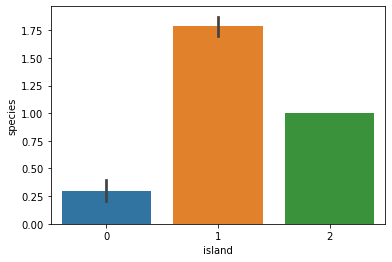

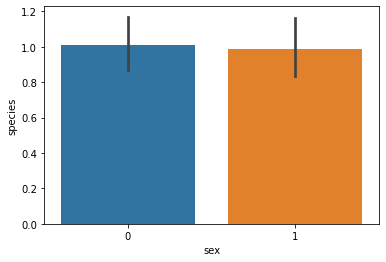

In [484]:
for col in discrete_cols:
    sns.barplot(x = new_df[col], y = new_df['species'], estimator = np.mean)
    plt.show()

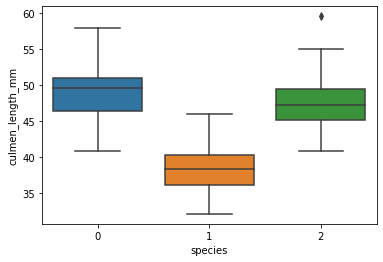

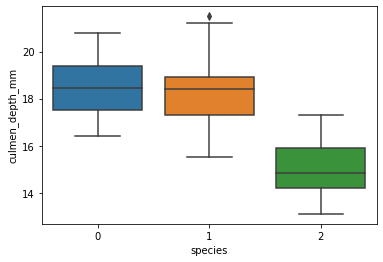

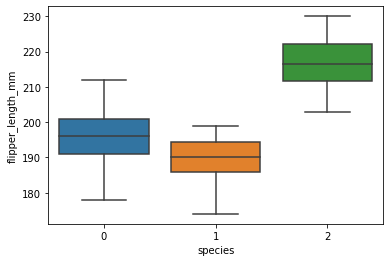

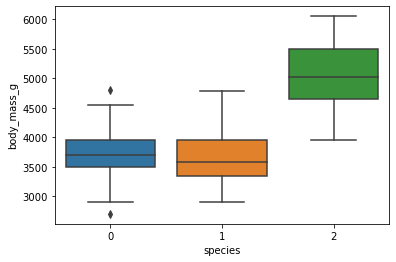

In [485]:
for col in continuous_cols:
    sns.boxplot(x = new_df['species'], y = new_df[col] )
    plt.show()

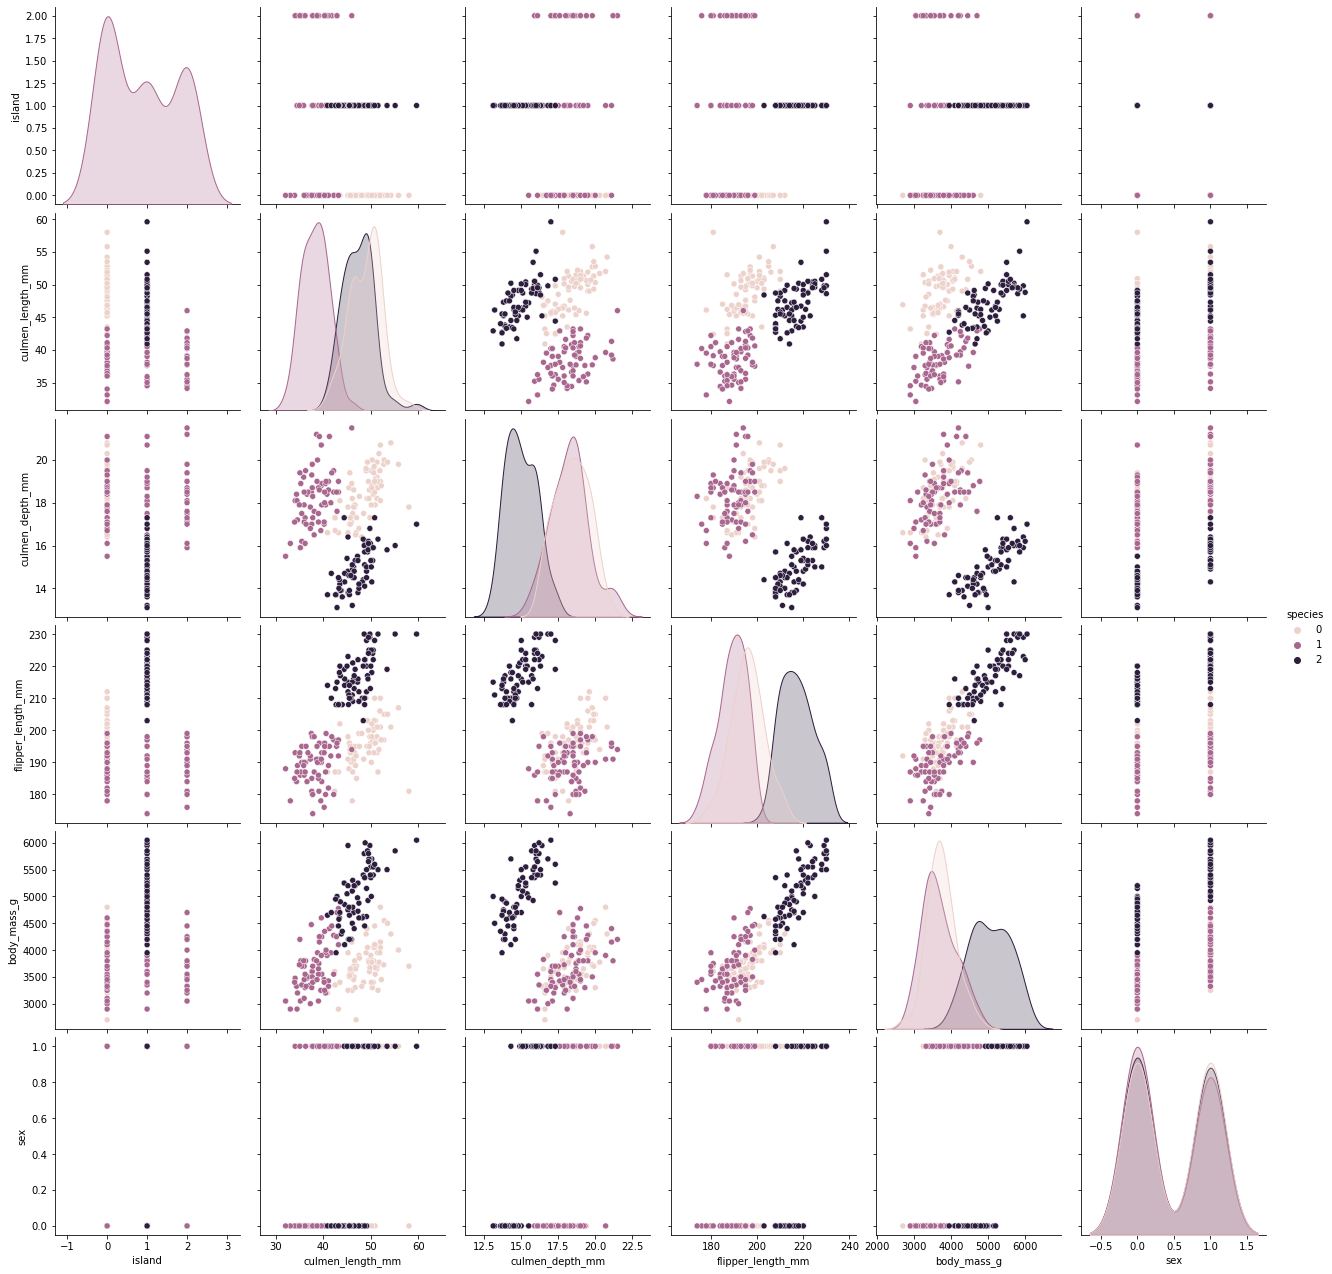

In [486]:
sns.pairplot(new_df, hue = "species", height=3)

<AxesSubplot:>

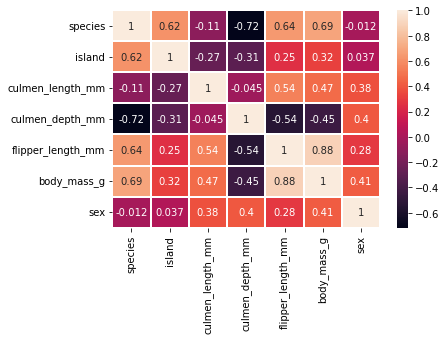

In [487]:
sns.heatmap(new_df.corr(),annot=True, linewidths=0.1)

**Discussion**
- After analyzing above plots we can observe that 'sex' has very minimal correlation to species.
- Therefore I selected only 'island', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', and'body_mass_g' as features
- Traget will be classification of 'species'

In [488]:
new_df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [489]:
# Drop column 'sex'
new_df = new_df.drop(['sex'],axis=1)

In [490]:
new_df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g'],
      dtype='object')

In [491]:
# Setting the X and y
X = new_df[['island', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']]
y = new_df['species']

#### Train test split

In [492]:
percent_train = 0.7
m,n  = X.shape
idx = np.arange(0,m)

# 1. shuffle index
random.shuffle(idx)

# 2. Create train/test index
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]

# 3. Separate X_Train, y_train, X_test, y_test
X_train = X.iloc[train_idx,:]
X_test = X.iloc[test_idx,:]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]

# 4. Drop shuffle index columns
X_train = X_train.reset_index()
X_train = X_train.drop(['index'],axis=1)
X_test = X_test.reset_index()
X_test = X_test.drop(['index'],axis=1)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [493]:
print(X_train.head(3))
print(X_test.head(3))
print(y_train[:3])
print(y_test[:3])

   island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0       1              42.6             13.7              213.0       4950.0
1       1              48.7             14.1              210.0       4450.0
2       0              51.7             20.3              194.0       3775.0
   island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0       0              39.7             17.9              193.0       4250.0
1       0              46.4             18.6              190.0       3450.0
2       0              50.9             17.9              196.0       3675.0
0    2
1    2
2    0
Name: species, dtype: int64
0    1
1    0
2    0
Name: species, dtype: int64


#### Normalizing the data

In [494]:
mean_train = X_train.mean(axis=0)
mean_train

island                  0.654930
culmen_length_mm       44.657042
culmen_depth_mm        17.169718
flipper_length_mm     200.450704
body_mass_g          4136.971831
dtype: float64

In [495]:
std_train = X_train.std(axis=0)
std_train

island                 0.694924
culmen_length_mm       5.563539
culmen_depth_mm        1.914335
flipper_length_mm     13.832625
body_mass_g          784.895746
dtype: float64

In [496]:
X_train_norm = (X_train-mean_train)/std_train
print(X_train_norm.head(3))

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0  0.496559         -0.369736        -1.812493           0.907224     1.035842
1  0.496559          0.726688        -1.603543           0.690346     0.398815
2 -0.942448          1.265913         1.635179          -0.466340    -0.461172


In [497]:
# To prevent data leakage normalizing the test set is done using the training normalization parameters

X_test_norm = (X_test-mean_train)/std_train
print(X_test_norm.head(3))

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0 -0.942448         -0.890987         0.381481          -0.538633     0.144004
1 -0.942448          0.313282         0.747143          -0.755511    -0.875240
2 -0.942448          1.122120         0.381481          -0.321754    -0.588577


#### Train the classification model and training cost plot

In [498]:
# num_class is the number of unique labels
num_class = y.nunique()

# Insert 1 for intercept
X_train_norm.insert(0, "intercept", 1)
X_test_norm.insert(0, "intercept", 1)

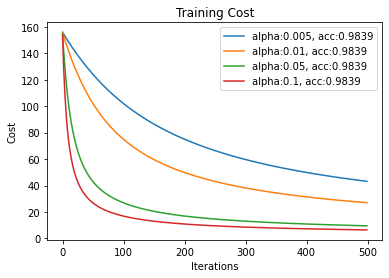

In [499]:
theta_arr = []
cost_arr = []
accuracy_arr = []

alpha_arr = np.array([.005, .01, .05, .1])
iterations_arr = np.array([500, 500, 500, 500])

m, n = X_train_norm.shape

for i in range(0, len(alpha_arr)):    
    theta_initial_i = np.ones((num_class, n))  
    theta_i, cost_i = my_gradient_descent(X_train_norm, y_train, theta_initial_i, alpha_arr[i], iterations_arr[i], num_class)
    
    y_pred = []
    for index,row in X_test_norm.iterrows(): 
        y_hat = h(row, theta_i, num_class)
        prediction = int(np.where(y_hat == y_hat.max())[0])
        y_pred.append(prediction)
        
    accuracy_i = calc_accuracy(y_test, y_pred)
    
    theta_arr.append(theta_i)
    cost_arr.append(cost_i)    
    accuracy_arr.append(accuracy_i)
    
    plt.plot(cost_i, label='alpha:'+str(alpha_arr[i]) +', acc:' + str(np.round(accuracy_arr[i],4)))
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Cost')
plt.legend()
plt.show()

#### Accuracy

In [500]:
for i in range(0, len(alpha_arr)):
    acc_i = 'alpha: ' + str(alpha_arr[i]) +',\t acc: ' + str(np.round(accuracy_arr[i],6))
    print(acc_i)

alpha: 0.005,	 acc: 0.983871
alpha: 0.01,	 acc: 0.983871
alpha: 0.05,	 acc: 0.983871
alpha: 0.1,	 acc: 0.983871


### Discussion:

- In this experiment, I used the Palmer Archipelago (Antarctica) penguin dataset which can be used for the classification of Penguins species.
 
**Problem statement** - Classify penguins in Palmer Archipelago using features island ,culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g and sex into three species types 'Adelie', 'Gentoo' and 'Chinstrap'.
 
- **Following are the steps I followed in the experiment:**
    - Load the dataset
    - Cleaning the dataset 
        - When exploring the dataset I noticed that there are few rows where many of the columns have NaN. Such rows were dropped.
    - Filling missing values
        - After rows where many of the columns have NaN, only the column 'sex' had missing values. Those missing values were filled in maintaining approximately the same ratio as the original dataset
    - Examine the distribution of the target column 'species'
        - When I look at the distribution of the target column 'species', I saw that type 'Chinstrap' we have only 68 samples causing an imbalanced class problem. To solve this I used the 'Undersampling' approach. From Adelie' and 'Gentoo' species types, I selected 68 samples at random.
        - new_df is a concatenation of 68 samples from each species type.
    - Converting categorical data to numerical 
        - In the dataset 'island', 'sex', 'species' were labels. Since each of them had few label types(maximum 3) they were encoded with integer values 0,1,2
    - Extracting X and y
        - y is set to the 'species' column. To find out suitable features examined the relationship within data using several plot types such as barplot, boxplot, pairplot, and heatmap.
        - By analyzing them it was clear that 'sex' has very minimal correlation to species.
        - Therefore I selected only 'island', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', and'body_mass_g' as features.
    - Train test split
        - 70% of the samples were used in training and 30 % were used in testing the accuracy of the model
    - Normalizing the data
        - I normalized the training set and save the normalization parameters and then normalized the test set using the training normalization parameters to prevent data leakage.
    - Train the classification model and training cost plot
        - As in the previous exercise to experiment with different learning rates I selected four different values (.005, .01, .05, .1).
        - Training cost values were collected as training goes on and plotted the cost.
    - Analysis of accuracy
        - In my experiment, all selected alpha values resulted in the same accuracy(98.39 %) after 500 iterations.
        - But from the cost plot, we can see that when alpha 0.05 and 0.1, training cost stabilizers in less number of iterations (around 250 iterations) compared to lower alpha values.
    - Conclusion 
        - Since test dataset accuracy is around 98.39%, we can use features such as island ,culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g to classify penguins in Palmer Archipelago in to the three classes 'Adelie', 'Gentoo' and 'Chinstrap'.

     

    
